In [3]:
%pip install pandas
%pip install tensorflow
%pip install sklearn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<h1 align = 'center'> Prepare input data </h1>

In [5]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris_data = pd.read_csv("iris.csv")
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder() #string to numerical
iris_data['Species'] = label_encoder.fit_transform(
    iris_data['Species']
)

np_iris = iris_data.to_numpy() 

In [7]:
X_data = np_iris[:, 0:4]
Y_data = np_iris[:, 4]

In [8]:
scaler = StandardScaler().fit(X_data)

In [9]:
X_data = scaler.transform(X_data)

In [10]:
Y_data = tf.keras.utils.to_categorical(Y_data, 3)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.10) #train and test

<h1 align = 'center'> Creationg of model </h1>

In [13]:
from tensorflow import keras

NB_CLASSES = 3

In [15]:
model = tf.keras.models.Sequential() #Create model
model.add(keras.layers.Dense(128,
                             input_shape = (4,),
                             name='Hidden-Layer-1',
                             activation='relu')) #First

model.add(keras.layers.Dense(128,
                             name='Hidden-Layer-2',
                             activation='relu')) #Second

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax')) #Output

In [16]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h1 align='center'> Training and evaluation </h1>

In [17]:
VERBOSE = 1

#Hyperparameters

BATCH_SIZE = 16
EPOCHS = 10
VALIDATIN_SPLIT = 0.2

In [19]:
#Fit model
history = model.fit(X_train,
                    Y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE,
                    validation_split = VALIDATIN_SPLIT)

Epoch 1/10
7/7 [==============================] - 1s 26ms/step - loss: 0.8166 - accuracy: 0.7130 - val_loss: 0.5084 - val_accuracy: 0.8889
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 0.5555 - accuracy: 0.7778 - val_loss: 0.3800 - val_accuracy: 0.9259
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4520 - accuracy: 0.8241 - val_loss: 0.3118 - val_accuracy: 0.9259
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3905 - accuracy: 0.8519 - val_loss: 0.2563 - val_accuracy: 0.9630
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3471 - accuracy: 0.8796 - val_loss: 0.2176 - val_accuracy: 0.9630
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3149 - accuracy: 0.8519 - val_loss: 0.1947 - val_accuracy: 0.9630
Epoch 7/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2842 - accuracy: 0.8704 - val_loss: 0.1716 - val_accuracy: 0.9630
Epoch 8/10
7/7 [=================

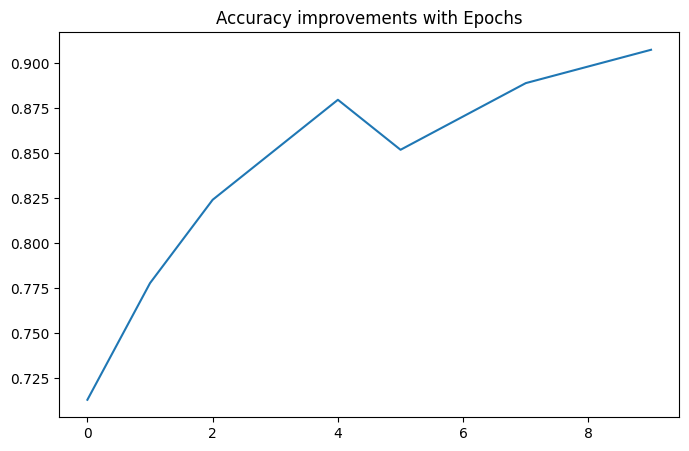

In [20]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvements with Epochs")
plt.show()

In [21]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.2215 - accuracy: 0.8667


[0.22152763605117798, 0.8666666746139526]

<h1 align='center'> Saveing models </h1>

In [22]:
model.save("iris_save") #saving model

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


In [23]:
loaded_model = keras.models.load_model("iris_save") #Loading model
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h1 align = 'center'> Predictions </h1>

In [24]:
prediction_input = [[6.6, 3., 4.4, 1.4]] #raw data
scaled_input = scaler.transform(prediction_input)

In [26]:
raw_prediction = model.predict(scaled_input)
print("Raw prediction probabilities:", raw_prediction)

prediction = np.argmax(raw_prediction)
print("Prediction is:", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 18ms/step
Raw prediction probabilities: [[0.02940144 0.703222   0.2673766 ]]
Prediction is: ['versicolor']
